In [1]:
import pandas as pd
import numpy as np

In [2]:
df_nut = pd.read_csv("../00_data/09_02_combined_final_test.csv", sep=',', error_bad_lines=False)

b'Skipping line 5210: expected 7 fields, saw 8\nSkipping line 5211: expected 7 fields, saw 8\nSkipping line 5212: expected 7 fields, saw 8\n'


In [3]:
df_nut.loc[df_nut["item_name"].str.contains("Lays")]

chain category_clean   item_name serve_size serve_size_unit  \
5202  Subway          sides  Lays chips         30               g   
5203  Subway          sides  Lays chips         30               g   
5204  Subway          sides  Lays chips         30               g   
5205  Subway          sides  Lays chips         30               g   
5206  Subway          sides  Lays chips         30               g   
5207  Subway          sides  Lays chips         30               g   

     nutrition_indicator value_per_serving  
5202       calories_kcal               181  
5203         total_fat_g                10  
5204     saturated_fat_g                 1  
5205      cholesterol_mg                 0  
5206           sodium_mg                50  
5207     carbohydrates_g                18

Attention: 09_02 is used here, which has 3 missing values for Lays Chips compared to 09_combined_final_test.

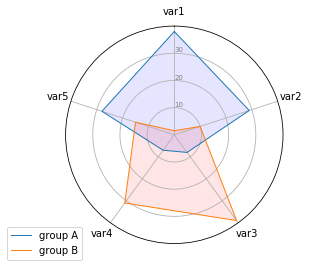

In [4]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


In [5]:
df

group  var1  var2  var3  var4  var5
0     A  38.0    29     8     7    28
1     B   1.5    10    39    31    15
2     C  30.0     9    23    33    32
3     D   4.0    34    24    14    14

In [6]:
df_nut.head()

chain category_clean              item_name serve_size  \
0  McDondalds       beverage  Vanilla Shake (Small)     340,96   
1  McDondalds       beverage  Vanilla Shake (Small)     340,96   
2  McDondalds       beverage  Vanilla Shake (Small)     340,96   
3  McDondalds       beverage  Vanilla Shake (Small)     340,96   
4  McDondalds       beverage  Vanilla Shake (Small)     340,96   

  serve_size_unit nutrition_indicator value_per_serving  
0              ml       calories_kcal               530  
1              ml         total_fat_g                15  
2              ml     saturated_fat_g                10  
3              ml      cholesterol_mg                60  
4              ml           sodium_mg               160

In [7]:
x = df_nut.loc[(df_nut["chain"] == "McDonald") & (df_nut["nutrition_indicator"] == "calories_kcal"), "value_per_serving"]

In [8]:
df_nut.pivot(columns = "nutrition_indicator", values = "value_per_serving")

nutrition_indicator calories_kcal carbohydrates_g cholesterol_mg  \
0                             530             NaN            NaN   
1                             NaN             NaN            NaN   
2                             NaN             NaN            NaN   
3                             NaN             NaN             60   
4                             NaN             NaN            NaN   
...                           ...             ...            ...   
5203                          NaN             NaN            NaN   
5204                          NaN             NaN            NaN   
5205                          NaN             NaN              0   
5206                          NaN             NaN            NaN   
5207                          NaN              18            NaN   

nutrition_indicator dietary_fiber_g protein_g saturated_fat_g sodium_mg  \
0                               NaN       NaN             NaN       NaN   
1                               NaN       NaN             NaN       NaN   
2                               NaN       NaN              10       NaN   
3                               NaN       NaN             NaN       NaN   
4                               NaN       NaN             NaN       160   
...                             ...       ...             ...       ...   
5203                            NaN       NaN             NaN       NaN   
5204                            NaN       NaN               1       NaN   
5205                            NaN       NaN             NaN       NaN   
5206                            NaN       NaN             NaN        50   
5207                            NaN       NaN             NaN       NaN   

nutrition_indicator sugars_g total_fat_g  
0                        NaN         NaN  
1                        NaN          15  
2                        NaN         NaN  
3                        NaN         NaN  
4                        NaN         NaN  
...                      ...         ...  
5203                     NaN          10  
5204                     NaN         NaN  
5205                     NaN         NaN  
5206                     NaN         NaN  
5207                     NaN         NaN  

[5208 rows x 9 columns]

In [71]:
spider_chart = pd.read_csv("../00_data/09_03_spider_chart.csv")

In [72]:
spider_chart

group calories_kcal cholesterol_mg saturated_fat_g sodium_mg sugars_g
0  Burger King        0,4519         1,2460          1,6500    1,8933   3,1000
1   McDondalds        0,6963         1,8371          1,0000    2,4000   2,5600
2       Subway        0,5889         1,0703          1,5000    2,6200   1,5200

In [160]:
sc = spider_chart.transpose()
sc = sc.reset_index()
sc.columns = sc.iloc[0]
sc = sc.drop(sc.index[0])
sc = sc.rename(columns = {"Burger King":"Burger_King"})
sc = sc.rename(columns = {"McDondalds":"McDonalds"})
sc["Burger_King"] = sc["Burger_King"].str.replace(",", ".")
sc["McDonalds"] = sc["McDonalds"].str.replace(",", ".")
sc["Subway"] = sc["Subway"].str.replace(",", ".")
sc

0            group Burger_King McDonalds  Subway
1    calories_kcal      0.4519    0.6963  0.5889
2   cholesterol_mg      1.2460    1.8371  1.0703
3  saturated_fat_g      1.6500    1.0000  1.5000
4        sodium_mg      1.8933    2.4000  2.6200
5         sugars_g      3.1000    2.5600  1.5200

In [163]:
sc["Burger_King"] = pd.to_numeric(sc.Burger_King, errors="coerce")
sc["Subway"] = pd.to_numeric(sc.Subway, errors="coerce")
sc["McDonalds"] = pd.to_numeric(sc.McDonalds, errors="coerce")
sc.dtypes

0
group           object
Burger_King    float64
McDonalds      float64
Subway         float64
dtype: object

In [168]:
import plotly.graph_objects as go

categories = sc["group"].to_list()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=sc["Burger_King"].to_list(),
      theta=categories,
      fill='toself',
      name='Burger King'
))
fig.add_trace(go.Scatterpolar(
      r=sc['McDonalds'].to_list(),
      theta=categories,
      fill='toself',
      name='McDonalds'
))

fig.add_trace(go.Scatterpolar(
      r=sc["Subway"].to_list(),
      theta=categories,
      fill='toself',
      name='Subway'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 4]
    )),
  showlegend=False
)

fig.show()